In [149]:
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
sns.set_style("darkgrid")
if os.path.isdir("decision_tree"):
    shutil.rmtree("decision_tree")
os.makedirs("decision_tree")

In [150]:
# def split3(l):
#     l1, l2 = train_test_split(l, test_size=0.66, random_state=42)
#     l2, l3 = train_test_split(l2, test_size=0.5, random_state=42)
#     return [l1, l2, l3]

In [151]:
file = pd.read_csv("data.csv")
columns = file.columns[8:15]
columns_all0 = []
for i, val in enumerate(file.columns):
    if i == 0:
        continue
    if val.split("_")[1] == "0":
        columns_all0.append(val)
time_labels = [int(i.split("_")[1]) for i in columns]
bottom_limit = .69
top_limit = .75
train, test = train_test_split(file, test_size=0.2, random_state=42)

In [152]:
# plt.figure(figsize=(11, 7))
# for i in file[columns].iloc:
#     data = np.array(i)
#     plt.xlabel('time')
#     plt.ylabel('Uobr')
#     plt.plot(time_labels, data, color='steelblue', linewidth=1)
# plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
# plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

In [153]:
# plt.figure(figsize=(11, 7))
# for i in file[columns].iloc:
#     data = np.array(i)
#     plt.xlabel('time')
#     plt.ylabel('Uobr')
#     plt.scatter(time_labels, data, color='steelblue', marker=".")
# plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
# plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

In [154]:
train_x = []
train_y = []
for t, c in zip(time_labels, columns):
    for i in train.iloc:
        train_x.append([i[j] for j in columns_all0] + [t])
        train_y.append(True if bottom_limit < i[c] < top_limit else False)
print(train_x)
print(train_y)

[[1.825, 0.698, 2.817, 18.9, 24.23, 3.84, 507.7, 6.204, 0], [1.825, 0.698, 2.887, 17.88, 21.09, 3.76, 505.9, 6.228, 0], [1.825, 0.697, 2.694, 18.99, 21.32, 3.87, 506.0, 6.3, 0], [1.83, 0.699, 2.957, 18.81, 23.38, 3.92, 507.3, 6.228, 0], [1.83, 0.69, 2.5, 19.35, 23.64, 3.72, 495.9, 6.384, 0], [1.83, 0.7, 2.641, 20.26, 21.6, 4.17, 509.8, 5.944, 0], [1.83, 0.701, 3.212, 19.59, 19.51, 3.88, 508.2, 6.212, 0], [1.825, 0.696, 2.597, 18.09, 20.04, 3.94, 508.7, 6.052, 0], [1.825, 0.698, 2.887, 18.7, 20.25, 3.87, 507.5, 6.168, 0], [1.83, 0.701, 2.949, 20.21, 22.3, 3.91, 508.6, 6.1, 0], [1.83, 0.697, 2.682, 20.27, 20.6, 4.0, 507.9, 6.164, 0], [1.825, 0.693, 2.509, 19.11, 20.01, 3.9, 508.0, 6.168, 0], [1.83, 0.698, 2.913, 20.84, 19.9, 3.82, 508.4, 6.188, 0], [1.825, 0.701, 2.922, 20.02, 23.55, 3.93, 508.6, 6.076, 0], [1.825, 0.699, 3.283, 22.37, 20.75, 3.74, 505.1, 6.2, 0], [1.83, 0.695, 2.588, 19.52, 21.5, 3.9, 507.6, 6.192, 0], [1.83, 0.698, 2.676, 19.95, 20.06, 4.1, 509.6, 5.956, 0], [1.825, 0.

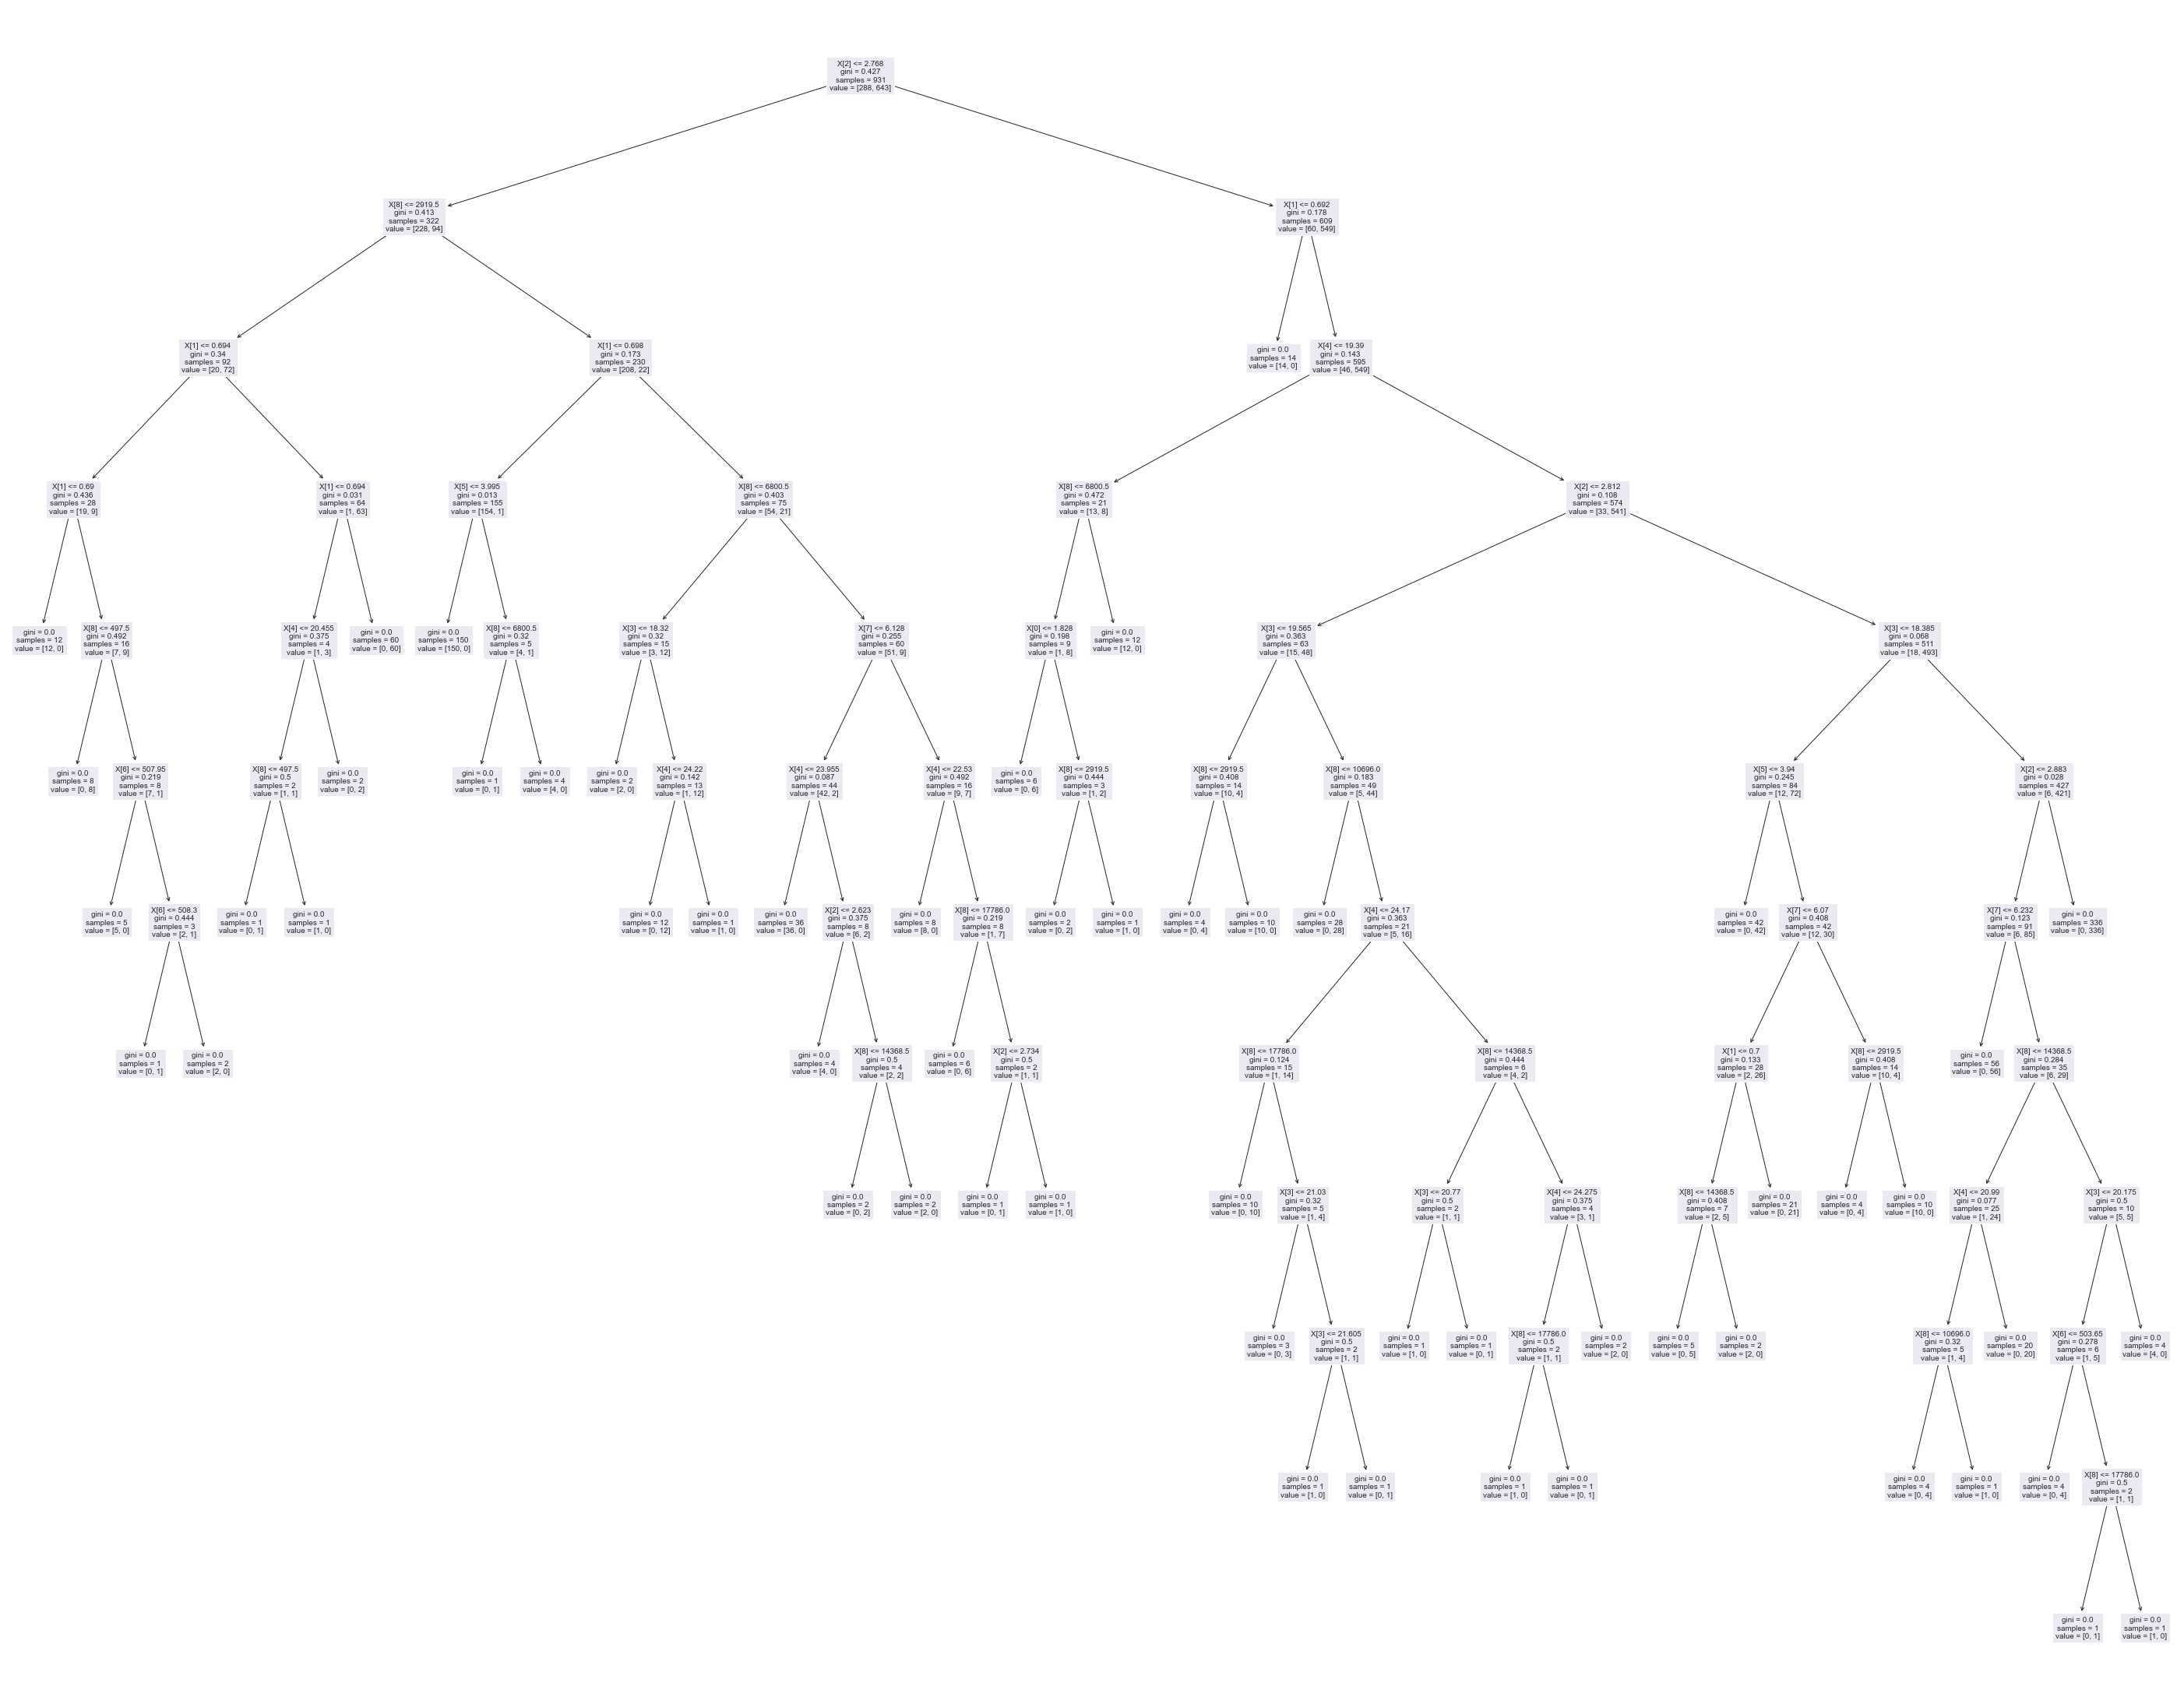

In [155]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
model.score(train_x, train_y)
plt.figure(figsize=(50, 40))
plot_tree(model)
plt.savefig("decision_tree/decision_tree.jpg")

In [156]:
test_x = []
test_y = []
test_working_experiment = []
for t, c in zip(time_labels, columns):
    working = 0
    x = []
    y = []
    for i in test.iloc:
        x.append([i[j] for j in columns_all0] + [t])
        if bottom_limit < i[c] < top_limit:
            working += 1
            y.append(True)
        else:
            y.append(False)
    test_x.append(x)
    test_y.append(y)
    test_working_experiment.append(working / test.shape[0])
print(test_working_experiment)

[0.9411764705882353, 0.8823529411764706, 0.7941176470588235, 0.7647058823529411, 0.7058823529411765, 0.6470588235294118, 0.6470588235294118]


In [157]:
test_working_predict = []
test_errors = []
err_cnt = 0;
for x_arr, y_arr in zip(test_x, test_y):
    working = 0;
    pred = model.predict(x_arr)
    for p, y in zip(pred, y_arr):
        if p:
            working += 1
        if p != y:
            err_cnt += 1
    test_working_predict.append(working / test.shape[0])
    test_errors.append(model.score(x_arr, y_arr))
print(test_working_predict)

[0.9411764705882353, 0.9117647058823529, 0.6470588235294118, 0.6176470588235294, 0.6176470588235294, 0.5882352941176471, 0.5588235294117647]


In [158]:
print(f"Процент рабочих устройств:\n{'Время'.ljust(8)}{'Прогноз'.ljust(21)}{'Реальное значение'.ljust(21)}Ошибка:")
for t, p, e, err in zip(time_labels, test_working_predict, test_working_experiment, test_errors):
    print(f"{str(t).ljust(8)}{str(p).ljust(21)}{str(e).ljust(21)}{1 - err}")
print(f"Ошибка: {err_cnt / (test.shape[0] * len(time_labels))}")


Процент рабочих устройств:
Время   Прогноз              Реальное значение    Ошибка:
0       0.9411764705882353   0.9411764705882353   0.0
995     0.9117647058823529   0.8823529411764706   0.02941176470588236
4844    0.6470588235294118   0.7941176470588235   0.20588235294117652
8757    0.6176470588235294   0.7647058823529411   0.2647058823529411
12635   0.6176470588235294   0.7058823529411765   0.2647058823529411
16102   0.5882352941176471   0.6470588235294118   0.17647058823529416
19470   0.5588235294117647   0.6470588235294118   0.20588235294117652
Ошибка: 0.1638655462184874
